In [4]:
%reset -f
#import everything we need
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

Combine the files into one, with red and white wine being a label
Perform three linear regressions
White Data -> Quality
Red Data -> Quality
Combined -> Quality


## liner regression with quality red data

In [5]:

red = pd.read_csv("winequality-red.csv",sep=';') 
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


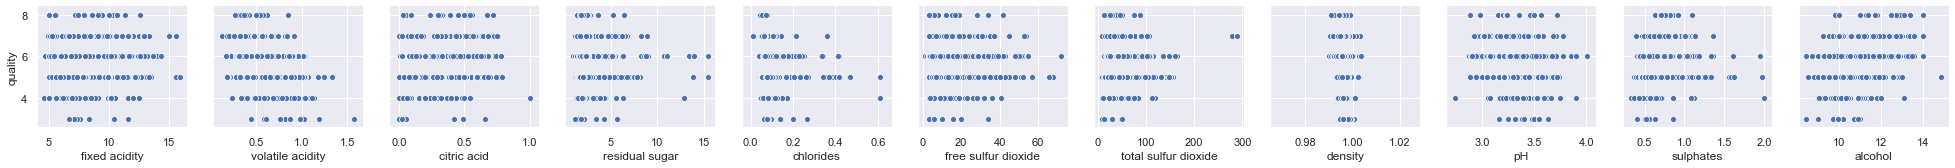

In [6]:
#pair plotting to visulize features vs quality
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
sns.pairplot(red,x_vars=features,y_vars='quality')

### Here I am taking all the features as predictors but some features that are not much correlated with target variable "Quality"could be eliminated

In [7]:
y = red.quality
x = red.drop('quality',axis = 1)

Create training and testing set using train_test_split. 25% of the data is used for testing and 75% for training. You can check the size of the dataset using x_train.shape

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [9]:
# fitting linear regression to training data
lr = LinearRegression()
fit=lr.fit(x_train,y_train)
## covert 1D array to 2D
#X=x_train.reshape(-1,1)
display(x_train.shape)
# print coeffecient
coeffecients = pd.DataFrame(lr.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

(1199, 11)

                      Coeffecient
fixed acidity            0.023274
volatile acidity        -0.991536
citric acid             -0.141268
residual sugar           0.008119
chlorides               -1.591924
free sulfur dioxide      0.005500
total sulfur dioxide    -0.003542
density                 -6.069166
pH                      -0.406325
sulphates                0.823603
alcohol                  0.294181


In [10]:
##To predict the quality of wine with this model, use predict()
train_pred = lr.predict(x_train)
print(train_pred)
test_pred = lr.predict(x_test) 
print(test_pred)

[5.33390209 5.33458216 5.94987004 ... 6.39109929 6.20184044 5.27719203]
[5.09908272 5.65580865 5.90927233 6.13810421 5.00495043 5.44066916
 5.05213654 6.15418124 5.52055599 5.77519663 5.61796132 5.23498287
 5.23127869 5.31466808 6.46439345 5.04000017 5.85280918 5.19300859
 6.0919118  6.34255254 6.41600994 5.52588684 5.80534686 4.93255733
 5.16159004 5.48207651 5.13834113 6.59480979 5.89478275 5.73709
 6.09133736 6.29529369 4.91616391 5.88376873 5.10515437 5.96400538
 6.80732578 5.03724291 5.25485064 5.88376873 5.17431803 4.84899008
 6.4903037  5.40465942 5.30375415 5.83513199 5.70825368 5.23988973
 5.24870634 5.46267267 5.08516492 5.61701512 6.01804854 6.32751521
 5.4628648  5.36127481 5.10151339 4.92009423 5.2240759  5.08722001
 4.79258875 5.43567381 5.25054561 5.6798788  5.85050157 6.52603804
 5.37941315 5.71598525 5.16966353 5.98159839 5.63912543 5.6004759
 5.74068429 5.22739422 5.98184324 5.51332746 5.40647057 5.68342011
 5.64578506 5.73709    6.23278066 5.29710528 4.66398697 6.042

157.22533474370545

'RMSE = 0.6269476348621658'

'RMSE_sklearn_way = 0.6269476348621658'

'[ 2.32736478e-02 -9.91535569e-01 -1.41267594e-01  8.11925585e-03\n -1.59192407e+00  5.50005690e-03 -3.54198549e-03 -6.06916616e+00\n -4.06325022e-01  8.23603060e-01  2.94180891e-01],9.982833331516778'

(array([ 4., 15., 35., 95., 99., 97., 31., 15.,  5.,  4.]),
 array([-1.87030853, -1.46201087, -1.05371321, -0.64541555, -0.23711788,
         0.17117978,  0.57947744,  0.9877751 ,  1.39607277,  1.80437043,
         2.21266809]),
 <a list of 10 Patch objects>)

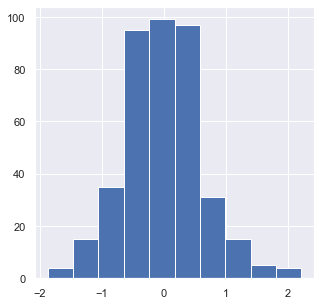

In [11]:
error=test_pred-y_test
sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x_test))
rmse_sklearn_way=np.sqrt(mean_squared_error(test_pred, y_test))
display(sse)
display("RMSE = "+ str(rmse)) ## root mean square error
display("RMSE_sklearn_way = "+ str(rmse_sklearn_way))
#ax.plot(x,y_pred,"-")
display(str(lr.coef_)+","+str(lr.intercept_))
f1 = plt.figure(figsize=(5,5))
ax1 = f1.add_subplot(111)
ax1.hist(error)

In [12]:

# another method to calculate rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)



0.6524682504422629
0.6269476348621658


## Same linear regression for white wine

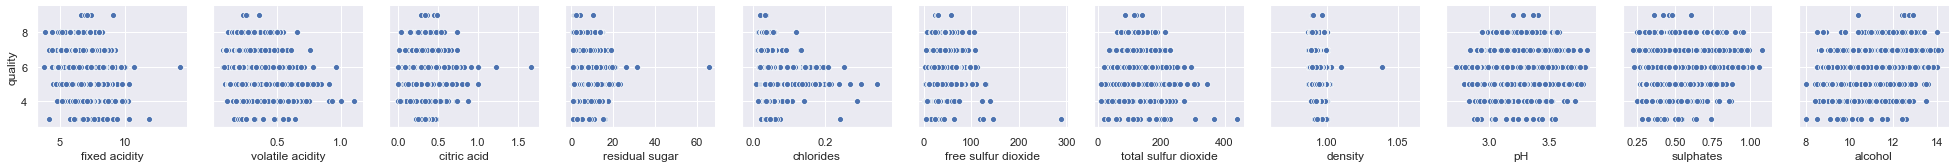

In [14]:
white = pd.read_csv("winequality-white.csv",sep=';') 
sns.pairplot(white,x_vars=features,y_vars='quality')

In [15]:
y = white.quality
x = white.drop('quality',axis = 1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)
# fitting linear regression to training data
lr = LinearRegression()
fit=lr.fit(x_train,y_train)
## covert 1D array to 2D
#X=x_train.reshape(-1,1)
display(x_train.shape)
# print coeffecient
coeffecients = pd.DataFrame(lr.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

(3673, 11)

                      Coeffecient
fixed acidity            0.070867
volatile acidity        -1.910509
citric acid              0.039270
residual sugar           0.082499
chlorides               -0.036208
free sulfur dioxide      0.003796
total sulfur dioxide    -0.000595
density               -147.240724
pH                       0.730192
sulphates                0.656917
alcohol                  0.194989


In [16]:
##To predict the quality of wine with this model, use predict()
train_pred = lr.predict(x_train)
print(train_pred)
test_pred = lr.predict(x_test) 
print(test_pred)

[5.78905927 5.63880653 5.41273412 ... 6.04017748 6.83454528 5.79454251]
[5.43469856 5.58443986 5.99680474 ... 5.54769464 5.70088267 5.423387  ]


701.1927234566003

'RMSE = 0.7565726820536661'

'RMSE_sklearn_way = 0.7565726820536661'

'[ 7.08672075e-02 -1.91050896e+00  3.92700519e-02  8.24994938e-02\n -3.62076438e-02  3.79589490e-03 -5.95091904e-04 -1.47240724e+02\n  7.30192091e-01  6.56917370e-01  1.94989276e-01],146.9903433558076'

(array([  8.,  27.,  88., 257., 396., 349.,  80.,  14.,   2.,   4.]),
 array([-2.80987308, -2.19087186, -1.57187063, -0.95286941, -0.33386818,
         0.28513304,  0.90413427,  1.52313549,  2.14213672,  2.76113795,
         3.38013917]),
 <a list of 10 Patch objects>)

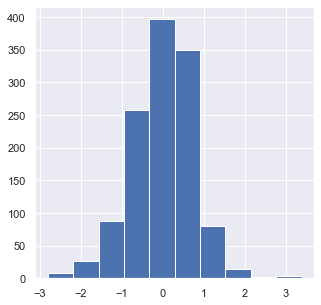

In [19]:
error=test_pred-y_test
sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x_test))
rmse_sklearn_way=np.sqrt(mean_squared_error(test_pred, y_test))
display(sse)
display("RMSE = "+ str(rmse)) ## root mean square error
display("RMSE_sklearn_way = "+ str(rmse_sklearn_way))
#ax.plot(x,y_pred,"-")
display(str(lr.coef_)+","+str(lr.intercept_))

f2 = plt.figure(figsize=(5,5))
ax2 = f2.add_subplot(111)
ax2.hist(error)

## Linear regression with combined data

In [22]:
red['label']="red"

white['label']="white"
combine=pd.concat([red,white])
display(combine)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


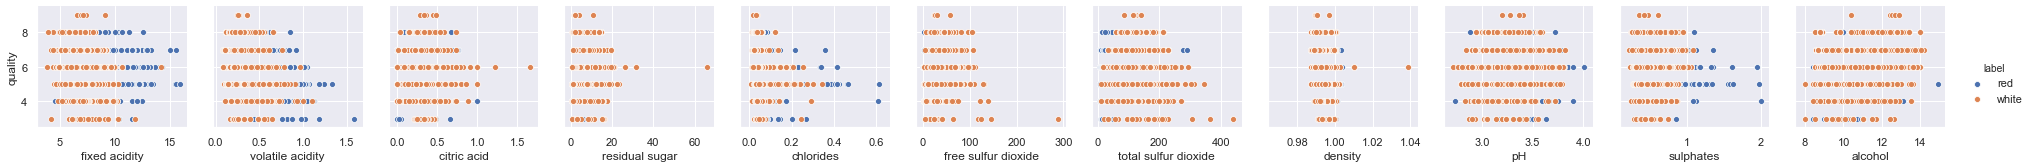

In [23]:
sns.pairplot(combine,x_vars=features,y_vars='quality',hue='label')

In [25]:
y = combine.quality
x = combine.drop(['quality','label'],axis = 1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)
# fitting linear regression to training data
lr = LinearRegression()
fit=lr.fit(x_train,y_train)

display(x_train.shape)
# print coeffecient
coeffecients = pd.DataFrame(lr.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

(4872, 11)

                      Coeffecient
fixed acidity            0.071884
volatile acidity        -1.388748
citric acid             -0.154161
residual sugar           0.040688
chlorides               -0.648144
free sulfur dioxide      0.004386
total sulfur dioxide    -0.002112
density                -49.538005
pH                       0.352031
sulphates                0.728115
alcohol                  0.273763


In [26]:
##To predict the quality of wine with this model, use predict()
train_pred = lr.predict(x_train)
print(train_pred)
test_pred = lr.predict(x_test) 
print(test_pred)

[6.64505675 6.2736387  5.27155579 ... 6.33111968 5.1875458  5.81908315]
[6.07641311 5.17630743 5.01418215 ... 6.46904461 6.22068357 6.3434818 ]


860.1039151149212

'RMSE = 0.727526437316059'

'RMSE_sklearn_way = 0.727526437316059'

'[ 7.18836630e-02 -1.38874764e+00 -1.54161196e-01  4.06880624e-02\n -6.48143613e-01  4.38644180e-03 -2.11204813e-03 -4.95380049e+01\n  3.52030598e-01  7.28114506e-01  2.73762589e-01],50.624293415367994'

(array([ 20.,  49., 156., 367., 513., 371., 116.,  23.,   7.,   3.]),
 array([-2.45758795, -1.89992604, -1.34226413, -0.78460223, -0.22694032,
         0.33072159,  0.8883835 ,  1.4460454 ,  2.00370731,  2.56136922,
         3.11903113]),
 <a list of 10 Patch objects>)

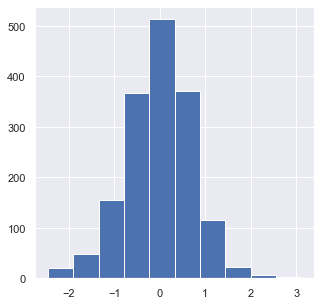

In [27]:
error=test_pred-y_test
sse=np.sum(error**2)
rmse=np.sqrt(sse/len(x_test))
rmse_sklearn_way=np.sqrt(mean_squared_error(test_pred, y_test))
display(sse)
display("RMSE = "+ str(rmse)) ## root mean square error
display("RMSE_sklearn_way = "+ str(rmse_sklearn_way))
#ax.plot(x,y_pred,"-")
display(str(lr.coef_)+","+str(lr.intercept_))

f3 = plt.figure(figsize=(5,5))
ax3 = f3.add_subplot(111)
ax3.hist(error)